# Importing Data

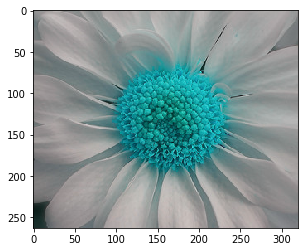

In [150]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
import random

CATEGORIES = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

# Viewing a Sample of the Data
for category in CATEGORIES:
    # Setting path
    path = os.path.join(os.pardir, 'Data', 'Flowers', category)

    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
        plt.imshow(img_array)
        plt.show()
        break
    break

In [151]:
# Pixel Data of the image
print(img_array)

[[[133 135 135]
  [136 138 138]
  [142 142 142]
  ...
  [153 153 153]
  [156 156 156]
  [148 148 148]]

 [[132 134 134]
  [135 137 137]
  [139 141 141]
  ...
  [153 153 153]
  [156 156 156]
  [148 148 148]]

 [[131 133 133]
  [134 136 136]
  [139 141 141]
  ...
  [153 153 153]
  [155 155 155]
  [146 146 146]]

 ...

 [[ 27  48  45]
  [ 26  47  44]
  [ 26  47  44]
  ...
  [125 126 130]
  [125 126 130]
  [124 125 129]]

 [[ 26  47  44]
  [ 26  47  44]
  [ 26  47  44]
  ...
  [125 126 130]
  [125 126 130]
  [125 126 130]]

 [[ 26  47  44]
  [ 26  47  44]
  [ 26  47  44]
  ...
  [127 128 132]
  [127 128 132]
  [127 128 132]]]


In [152]:
# Shape of a sample image
print(img_array.shape)

(263, 320, 3)


In [153]:
# Function to print an image
def print_image(img):
    plt.imshow(img)
    plt.show()

### Since we want uniformity I will choose an appropriate size to reshape all the images.

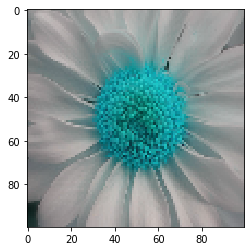

In [154]:
IMG_SIZE = 100 # This seems like a reaosable size such that too much info is not lost
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
print_image(new_array)

In [155]:
# Creating Training Data

training_data = []

def create_training_data():
    for category in CATEGORIES:
        # Setting path
        path = os.path.join(os.pardir, 'Data', 'Flowers', category)

        # Labeling the class
        class_num = CATEGORIES.index(category)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                # Converting RBG to RGB
                img_array = img_array[:, :, [2, 1, 0]]
                
                # Resizing
                img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([img_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [156]:
print(len(training_data)) # We could not load 3 images

4323


In [157]:
# Shuffling the training data
random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

2
0
1
2
3
1
3
2
1
1


In [158]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

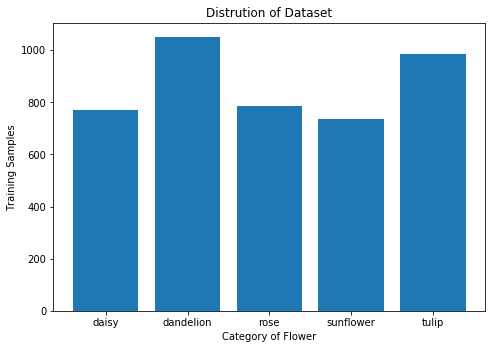

In [200]:
# Distribution of Data set

import matplotlib.pyplot as plt
A = np.unique(y, return_counts=True)

freq = []

for i in range(len(A[1])):
    freq.append(A[1][i])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
CATEGORIES = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
ax.bar(CATEGORIES, freq)
plt.xlabel("Category of Flower")
plt.ylabel("Training Samples")
plt.title("Distrution of Dataset")
plt.show()

There appears to be a slight bias in the training data. However it does not seems to be too extreme. Hence I will not exclude any training examples.

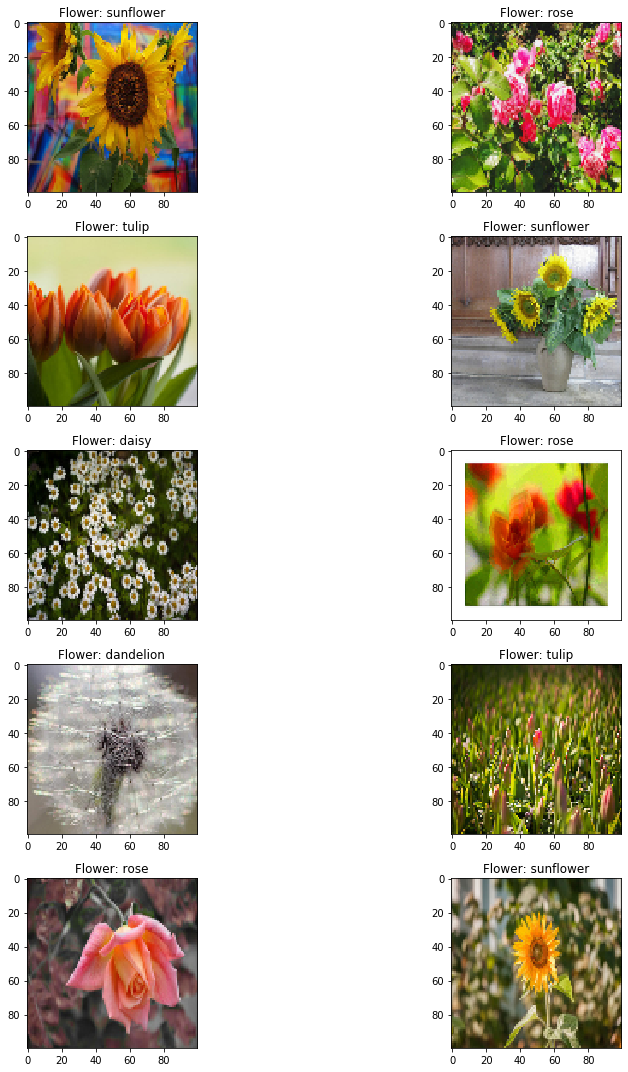

In [159]:
# Plotting Some Randome Samples
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l= random.randint(0,len(y))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+ str(CATEGORIES[y[l]]))
        
plt.tight_layout()

# Building Basic Models

In [160]:
# Performing a test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Normalizing data
X_train = np.divide(X_train, 255)
X_test = np.divide(X_test, 255)

In [161]:
# Function to test model
def test_model(model, trials):
    total_score = 0
    for trial in range(trials):
        train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2)
        model.fit(train_X,  train_y)
        total_score += model.score(test_X, test_y)
    print(f"Average Accuracy of the model : {round(total_score / trials, 3)}") 

In [162]:
def evaluate_model(model, X, y):
    val_loss, val_acc = model.evaluate(X, y)
    print(val_loss, val_acc)

## Dummy Model

In [163]:
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier(strategy = "most_frequent")

test_model(dummy_model, 10)

Average Accuracy of the model : 0.249


# Building Deep Learning Models

In [164]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

## Dense Layer Neural Network

In [165]:
model = Sequential()
model.add(Flatten())
model.add(Dense(256, activation = tf.nn.relu))
model.add(Dense(256, activation = tf.nn.relu))
model.add(Dense(5,activation = tf.nn.softmax))

model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
109/109 [==============================] - 8s 71ms/step - loss: 2.7542 - accuracy: 0.3216
Epoch 2/10
109/109 [==============================] - 7s 65ms/step - loss: 1.3811 - accuracy: 0.4294
Epoch 3/10
109/109 [==============================] - 7s 65ms/step - loss: 1.2865 - accuracy: 0.4647
Epoch 4/10
109/109 [==============================] - 7s 68ms/step - loss: 1.3450 - accuracy: 0.4523
Epoch 5/10
109/109 [==============================] - 7s 64ms/step - loss: 1.2680 - accuracy: 0.4656
Epoch 6/10
109/109 [==============================] - 7s 64ms/step - loss: 1.1587 - accuracy: 0.5174
Epoch 7/10
109/109 [==============================] - 8s 72ms/step - loss: 1.1613 - accuracy: 0.5191
Epoch 8/10
109/109 [==============================] - 7s 64ms/step - loss: 1.1443 - accuracy: 0.5350
Epoch 9/10
109/109 [==============================] - 7s 63ms/step - loss: 1.0914 - accuracy: 0.5564
Epoch 10/10
109/109 [==============================] - 7s 63ms/step - loss: 1.0634 - accura

In [166]:
evaluate_model(model, X_test, y_test)

28/28 [==============================] - 1s 30ms/step - loss: 1.2671 - accuracy: 0.4543
1.2670574188232422 0.4543352723121643


## Convolutional Neural Network

In [167]:
model = Sequential()

# Layer 1
model.add(Conv2D(128, (5, 5), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (3, 3)))

# Layer 2
model.add(Conv2D(128, (5, 5)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (3, 3)))
       
# Layer 3
model.add(Flatten())
model.add(Dense(128))
          
# Output Layer
model.add(Dense(5))
model.add(Activation('sigmoid'))
          
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
          
model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_split = 0.1)

Epoch 1/10
98/98 [==============================] - 189s 2s/step - loss: 1.3495 - accuracy: 0.4139 - val_loss: 1.2278 - val_accuracy: 0.5000
Epoch 2/10
98/98 [==============================] - 187s 2s/step - loss: 1.1654 - accuracy: 0.5039 - val_loss: 1.1205 - val_accuracy: 0.5202
Epoch 3/10
98/98 [==============================] - 192s 2s/step - loss: 1.0540 - accuracy: 0.5643 - val_loss: 1.0757 - val_accuracy: 0.5665
Epoch 4/10
98/98 [==============================] - 190s 2s/step - loss: 0.9675 - accuracy: 0.6067 - val_loss: 0.9931 - val_accuracy: 0.5925
Epoch 5/10
98/98 [==============================] - 194s 2s/step - loss: 0.8455 - accuracy: 0.6552 - val_loss: 0.9922 - val_accuracy: 0.5809
Epoch 6/10
98/98 [==============================] - 192s 2s/step - loss: 0.7682 - accuracy: 0.6873 - val_loss: 0.8601 - val_accuracy: 0.6301
Epoch 7/10
98/98 [==============================] - 188s 2s/step - loss: 0.6660 - accuracy: 0.7246 - val_loss: 0.9564 - val_accuracy: 0.6185
Epoch 8/10
98

In [168]:
evaluate_model(model, X_test, y_test)

28/28 [==============================] - 18s 656ms/step - loss: 1.4771 - accuracy: 0.5850
1.4770712852478027 0.5849710702896118


### Since flowers are not usually distinguished based on their color (they come in a variety of colors) I will try to see if loading grey scale images will help improve the accuracy.

In [169]:
training_data_gray = []

def create_training_data_gray():
    for category in CATEGORIES:
        # Setting path
        path = os.path.join(os.pardir, 'Data', 'Flowers', category)

        # Labeling the class
        class_num = CATEGORIES.index(category)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                
                # Resizing
                img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data_gray.append([img_array, class_num])
            except Exception as e:
                pass

create_training_data_gray()

In [170]:
print(len(training_data_gray))

4323


In [171]:
# Shuffling the training data
random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

3
2
2
1
0
4
1
4
2
0


In [172]:
X_g = []
y_g = []

for features, label in training_data_gray:
    X_g.append(features)
    y_g.append(label)

X_g = np.array(X_g).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_g = np.array(y_g)

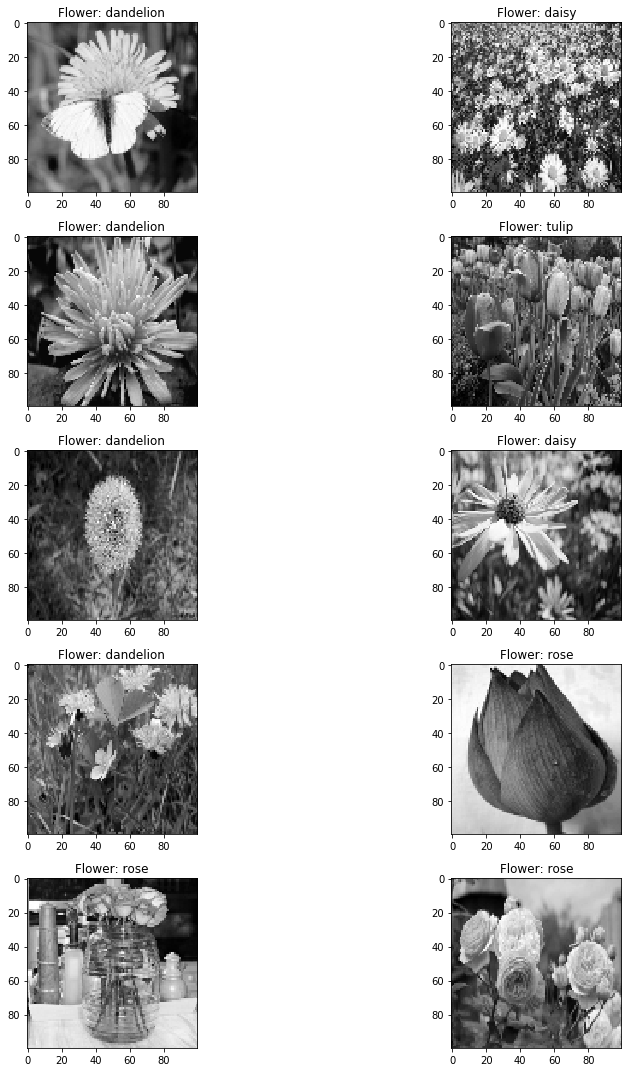

In [173]:
# Plotting Some Randome Samples
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l= random.randint(0,len(y_g))
        ax[i,j].imshow(X_g[l].reshape(IMG_SIZE, IMG_SIZE), cmap = 'gray')
        ax[i,j].set_title('Flower: '+ str(CATEGORIES[y_g[l]]))
        
plt.tight_layout()

In [174]:
# Performing a test train split
from sklearn.model_selection import train_test_split
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_g, y_g, test_size = 0.2)

# Normalizing data
X_train_g = np.divide(X_train_g, 255)
X_test_g = np.divide(X_test_g, 255)
# X_train_g

In [175]:
# Function to test model
def test_model_g(model, trials):
    total_score = 0
    for trial in range(trials):
        train_X, test_X, train_y, test_y = train_test_split(X_g, y_g, test_size = 0.2)
        model.fit(train_X,  train_y)
        total_score += model.score(test_X, test_y)
    print(f"Average Accuracy of the model : {round(total_score / trials, 3)}") 

## Dummy Model

In [176]:
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier(strategy = "most_frequent")

test_model_g(dummy_model, 10)

Average Accuracy of the model : 0.249


## Dense Layer Neural Network

In [177]:
model = Sequential()
model.add(Flatten())
model.add(Dense(256, activation = tf.nn.relu))
model.add(Dense(1024, activation = tf.nn.relu))
model.add(Dense(1024, activation = tf.nn.relu))
model.add(Dense(256, activation = tf.nn.relu))
model.add(Dense(5,activation = tf.nn.softmax))

model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train_g, y_train_g, batch_size = 8, epochs = 20)

Epoch 1/20
433/433 [==============================] - 12s 28ms/step - loss: 1.6126 - accuracy: 0.2669
Epoch 2/20
433/433 [==============================] - 12s 28ms/step - loss: 1.5623 - accuracy: 0.2973
Epoch 3/20
433/433 [==============================] - 12s 28ms/step - loss: 1.5525 - accuracy: 0.2958
Epoch 4/20
433/433 [==============================] - 12s 28ms/step - loss: 1.5392 - accuracy: 0.2976
Epoch 5/20
433/433 [==============================] - 12s 28ms/step - loss: 1.5370 - accuracy: 0.2981
Epoch 6/20
433/433 [==============================] - 13s 29ms/step - loss: 1.5289 - accuracy: 0.3002
Epoch 7/20
433/433 [==============================] - 12s 28ms/step - loss: 1.5255 - accuracy: 0.3054
Epoch 8/20
433/433 [==============================] - 12s 29ms/step - loss: 1.5246 - accuracy: 0.30020s - loss: 1.5249 - accura
Epoch 9/20
433/433 [==============================] - 13s 30ms/step - loss: 1.5189 - accuracy: 0.3048 - ETA: 0s -
Epoch 10/20
433/433 [=======================

In [178]:
evaluate_model(model, X_test_g, y_test_g)

28/28 [==============================] - 1s 19ms/step - loss: 1.5139 - accuracy: 0.2994
1.5138601064682007 0.2994219660758972


In [179]:
model = Sequential()

# Layer 1
model.add(Conv2D(128, (5, 5), input_shape = X_g.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (3, 3)))

# Layer 2
model.add(Conv2D(128, (5, 5)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (3, 3)))
       
# Layer 3
model.add(Flatten())
model.add(Dense(128))
          
# Output Layer
model.add(Dense(5))
model.add(Activation('sigmoid'))
          
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
          
model.fit(X_train_g, y_train_g, batch_size = 32, epochs = 10, validation_split = 0.1)

Epoch 1/10
98/98 [==============================] - 167s 2s/step - loss: 1.5675 - accuracy: 0.2902 - val_loss: 1.4993 - val_accuracy: 0.3526
Epoch 2/10
98/98 [==============================] - 159s 2s/step - loss: 1.4223 - accuracy: 0.3882 - val_loss: 1.3778 - val_accuracy: 0.4393
Epoch 3/10
98/98 [==============================] - 161s 2s/step - loss: 1.3311 - accuracy: 0.4566 - val_loss: 1.3998 - val_accuracy: 0.4306
Epoch 4/10
98/98 [==============================] - 168s 2s/step - loss: 1.1923 - accuracy: 0.5161 - val_loss: 1.3588 - val_accuracy: 0.4624
Epoch 5/10
98/98 [==============================] - 163s 2s/step - loss: 1.0661 - accuracy: 0.5758 - val_loss: 1.3808 - val_accuracy: 0.4682
Epoch 6/10
98/98 [==============================] - 160s 2s/step - loss: 0.9307 - accuracy: 0.6343 - val_loss: 1.3929 - val_accuracy: 0.4855
Epoch 7/10
98/98 [==============================] - 164s 2s/step - loss: 0.7876 - accuracy: 0.6989 - val_loss: 1.5206 - val_accuracy: 0.4653
Epoch 8/10
98

### The validation accuracy here is poor. I will try to use data augmentation to improve the accuracy of colored images.

## Data Augmentation

In [180]:
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

# Layer 1
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))

# Layer 2
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 
# Layer 3
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Layer 4
model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Layer 5 (Dense Layer)
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

# Output Layer
model.add(Dense(5))
model.add(Activation('softmax'))

# Setting Data augmentation parameters
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.2, 
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=False
)

datagen.fit(X_train)

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

batch_size = 32
steps = X_train.shape[0] // batch_size
epochs = 50

model.fit_generator(datagen.flow(X_train, y_train, batch_size = batch_size),
                                epochs = epochs, validation_data = (X_test, y_test),
                                verbose = 1, steps_per_epoch = steps)

Epoch 1/50
108/108 [==============================] - 82s 762ms/step - loss: 1.3451 - accuracy: 0.4142 - val_loss: 1.1232 - val_accuracy: 0.5249
Epoch 2/50
108/108 [==============================] - 89s 828ms/step - loss: 1.1545 - accuracy: 0.5196 - val_loss: 1.1073 - val_accuracy: 0.5526
Epoch 3/50
108/108 [==============================] - 92s 850ms/step - loss: 1.0430 - accuracy: 0.5897 - val_loss: 1.0827 - val_accuracy: 0.5642
Epoch 4/50
108/108 [==============================] - 84s 775ms/step - loss: 1.0281 - accuracy: 0.5917 - val_loss: 1.0255 - val_accuracy: 0.5838
Epoch 5/50
108/108 [==============================] - 83s 770ms/step - loss: 0.9507 - accuracy: 0.6214 - val_loss: 0.8427 - val_accuracy: 0.6775
Epoch 6/50
108/108 [==============================] - 85s 790ms/step - loss: 0.8991 - accuracy: 0.6629 - val_loss: 0.9423 - val_accuracy: 0.6382
Epoch 7/50
108/108 [==============================] - 78s 723ms/step - loss: 0.8797 - accuracy: 0.6529 - val_loss: 0.8653 - val_ac

In [181]:
evaluate_model(model, X_test, y_test)

28/28 [==============================] - 7s 239ms/step - loss: 0.6513 - accuracy: 0.7838
0.6513429880142212 0.7838150262832642


### Data Augmentation has helped improve the validation accuracy of my model significantly.

# Conclusion

From the difference in accuracy of gray scale and colored images, it is clear the color is an important feature (although a type of flower comes in a diverse variety of colors). Data augmentation helped increase the validation accuracy of my model, so that instead of just memorizing the training data, it was learning. This helped reduce overfitting and improved generalization.

The model that gave me the best accuracy of about 80 % on test data was a mutlilayered convolutional neural network, with additional data augmentation.

# This is the work of Anirudh Achal